# Data Science Life Cycle and Process

Step 1: Data Engineering 

- Get Data.ipynb 
>
> This notebook is designed to be the start of the data ingestion pipeline 
> for getting the Raw Data from Sources, GTZAN and Spotify

Step 2: Exploratory Data Analysis 

- EDA.ipynb
>
> This notebook is designed to be the EDA for audio feature extraction using Librosa. 
> We will explore things like Mel-Frequency Cepstral Coefficients and Canstant-Q Transform and Chromagram with Pitch Classes

Step 3: Modeling, Validation, and Testing

CNN - Convolution Neural Network    
KNN - K Nearst Neighbor 
- Modeling.ipynb
>
> This notebook is designed to be the implementation of KNN & CNN from Keras Tensorflow and can be run on either GTZAN(CNN Only) or Spotifiy datasets.
>      


# Install required libraries

In [ ]:
!pip install librosa ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=b9b6f6a910e9033fd1691b7e0c09352e7880ab3ac73105a5aa3b65a35a034da8
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


# Import Libraries

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, ffmpeg
import librosa.display
import pandas as pd
import scipy as sp
import numpy as np
import sklearn
import os

# Mount Google Drive

In [ ]:
drive.mount('/content/drive/')
#drive.flush_and_unmount()

Mounted at /content/drive/


# Play a selected audio sample

In [ ]:
#audio_path = '/content/drive/MyDrive/W207/Data/GTZAN/genres/blues/blues.00000.wav'
# audio_path = '/content/drive/MyDrive/W207/Data/Spotify/10-10-False-3/dance pop/0BjfodYJYki5xbxHJZe0Cf.mp3'
#audio_path = '/content/drive/MyDrive/W207/Data/Spotify/10-10-True-6/australian pop/3BUdRr4VGmNajx2wLWlGzl.mp3'
audio_path = '/content/drive/MyDrive/W207/Data/Spotify/10-10-False-6/dance pop/0HPD5WQqrq7wPWR7P7Dw1i.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(661501,) 22050


In [ ]:
ipd.Audio(audio_path)

## Display the wave form

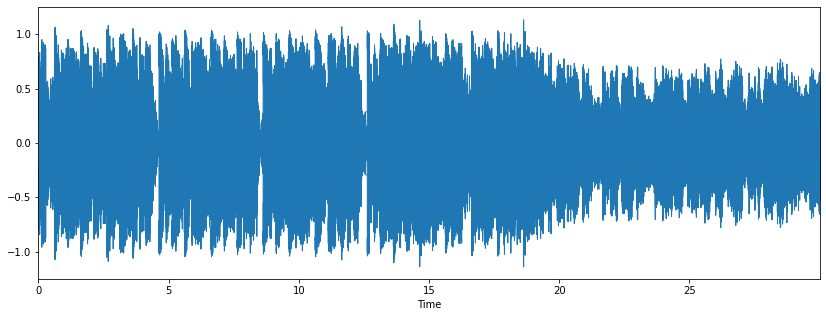

In [ ]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Zooming in on the Wave form

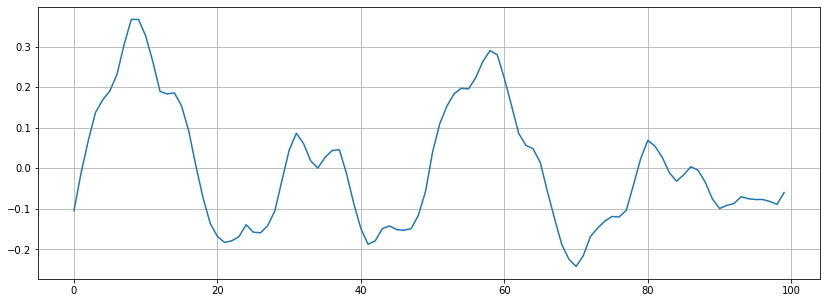

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

# Feature Extraction

Librosa Docs on Feature Extraction options
https://librosa.org/doc/main/feature.html#spectral-features

Here we have choose a few to look at that might provide possible insight to the types of algorithms in data science we might choose for classification of this problem set. 

## Zero-Crossing Rate

The zero-crossing rate is the rate of sign-changes along with a signal, 
i.e., the rate at which the signal changes from positive to negative or back. 
This feature has been used heavily in both speech recognition and music information retrieval. 
It usually has higher values for highly percussive sounds like those in metal and rock.

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

10


### Spectragraph Amplitude to DB (Hz vs Time)

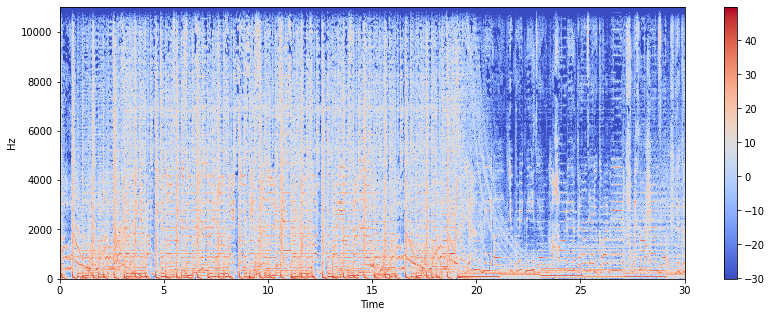

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Spectragraph Amplitude to DB (Log(Hz) vs Time)

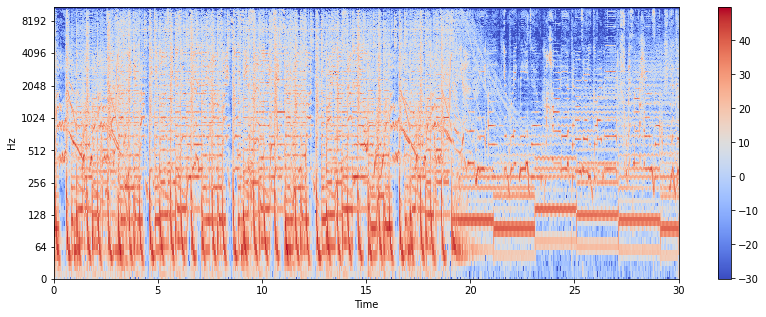

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Spectral Centroids

It indicates where the ” center of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. 
Consider two songs, one from a blues genre and the other belonging to metal. Now, as compared to the blues genre song, which is the same throughout its length, 
the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal 
song would be towards its end.

https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html

(1292,)


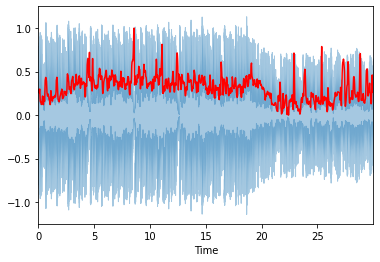

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
normalize = lambda x, axis=0: sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal:

## Spectral RollOff

Compute roll-off frequency.

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).


https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

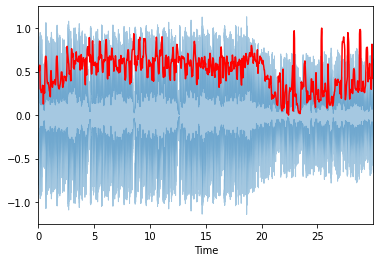

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g., 85%, lies.
# librosa.feature.spectral_rolloff computes the roll-off frequency for each frame in a signal:

## Mel-Frequency Cepstral Coefficients

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) that concisely describe the overall shape of a 
spectral envelope. It models the characteristics of the human voice.

https://librosa.org/doc/main/generated/librosa.feature.mfcc.html

MFCCS:  20 FRAMES:  1292


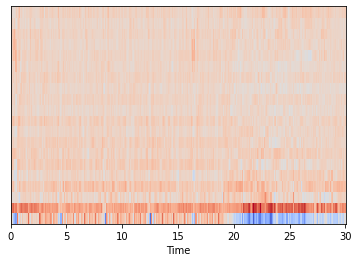

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print("MFCCS: ", mfccs.shape[0], "FRAMES: ", mfccs.shape[1])

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 1.1810208e-08  5.9051040e-09 -5.9051040e-09 -5.9051040e-09
  5.9051040e-09  1.7715312e-08  1.1810208e-08 -1.1810208e-08
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -5.9051040e-09
 -5.9051040e-09  5.9051040e-09  0.0000000e+00  2.9525520e-09
  0.0000000e+00 -4.4288280e-09  5.9051040e-09  7.3813800e-09]
[1.0000001 1.        1.0000001 1.        1.        0.9999999 1.
 1.        1.0000001 1.        1.        0.9999998 1.0000002 0.9999999
 1.0000001 0.9999999 1.        1.        1.        0.9999998]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


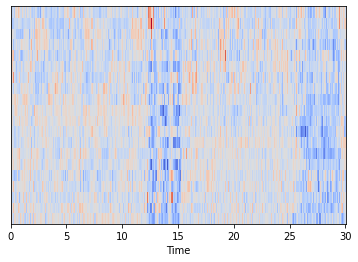

In [ ]:
# We can also perform feature scaling such that each coefficient dimension has zero mean and unit variance:

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

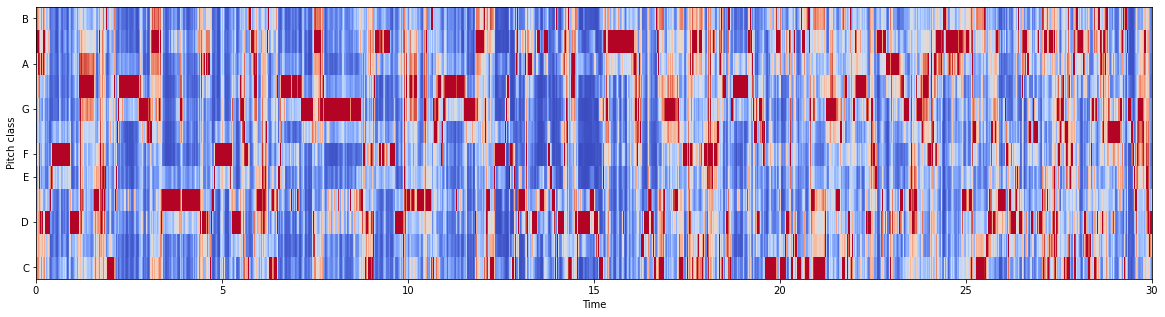

In [ ]:
# Chroma Frequencies
# Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.
# librosa.feature.chroma_stft is used for computation

# Loadign the file
hop_length = 30
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Load EDA Data Sets

In [ ]:
RootPath = '/content/drive/MyDrive/W207/Data/Spotify/10-200-False-6/'

# Compare Genre Samples


Frame Length: The number of samples in a frame.

Hop Length: The length between frames. (in samples)

We use 2048 frame length and 512 hop length for this work.

In [ ]:
hop_size = 512
frame_size = 2048
sampling_rate = 22050

XPath = RootPath + "dance pop/01HVq10MGFFhOt17x9TSnL.mp3"
YPath = RootPath + "rock/01ADfl2dm3ev0a7qcZN1Ix.mp3"
X,Xsr = librosa.load(XPath, sr=sampling_rate, mono=True, duration=5.0)
Y,Ysr = librosa.load(YPath, sr=sampling_rate, mono=True, duration=5.0)

XLabel = XPath.split('/')[-2]
YLabel = YPath.split('/')[-2]


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'rock')

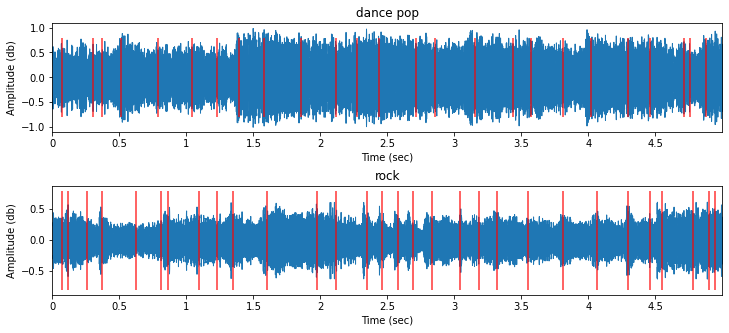

In [ ]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

X_frames = librosa.onset.onset_detect(X, sr=sampling_rate,hop_length=hop_size)
X_times = librosa.frames_to_time(X_frames)

plt.subplot(2,1,1)
librosa.display.waveplot(X, sr=sampling_rate)
plt.vlines(X_times, -0.8, 0.79, color='r', alpha=0.8)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (db)")
plt.title(XLabel)

Y_frames = librosa.onset.onset_detect(Y, sr=sampling_rate,hop_length=hop_size)
Y_times = librosa.frames_to_time(Y_frames)

plt.subplot(2,1,2)
librosa.display.waveplot(Y, sr=sampling_rate)
plt.vlines(Y_times, -0.8, 0.79, color='r', alpha=0.8)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (db)")
plt.title(YLabel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  from ipykernel import kernelapp as app


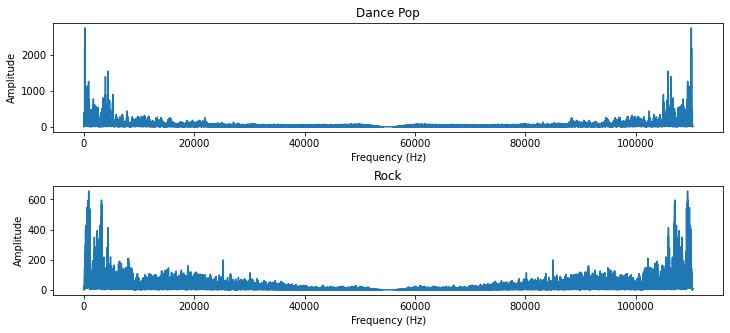

In [ ]:
# Fourier Transform and Spectrum

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
X_FFT = sp.fft(X)
X_FFT_Mag = np.absolute(X_FFT)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Dance Pop')
plt.plot(X_FFT_Mag)

plt.subplot(2,1,2)
Y_FFT = sp.fft(Y)
Y_FFT_Mag = np.absolute(Y_FFT)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Rock')
plt.plot(Y_FFT_Mag)

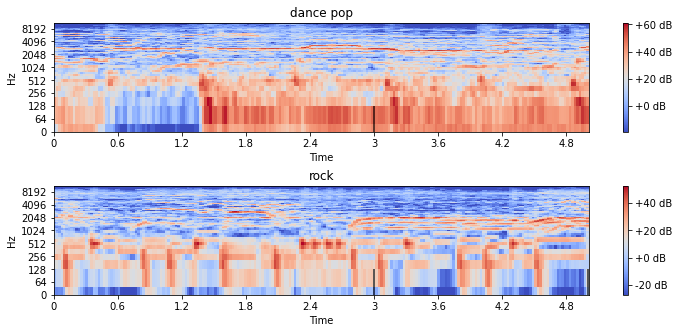

In [ ]:
window_size=2048

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
S = librosa.feature.melspectrogram(X, sr=sampling_rate, n_fft=window_size)
logS = librosa.amplitude_to_db(S)
plt.title(XLabel)
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(X_frames, 0, logS.shape[0], color='k', alpha=0.8)
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
S2 = librosa.feature.melspectrogram(Y, sr=sampling_rate, n_fft=window_size)
logS2 = librosa.amplitude_to_db(S2)
plt.title(YLabel)
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(Y_frames, 0, logS.shape[0], color='k', alpha=0.8)
plt.colorbar(format='%+2.0f dB')

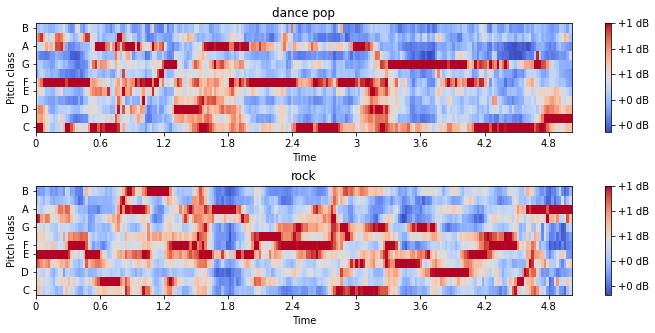

In [ ]:
#Canstant-Q Transform and Chromagram with Pitch Classes

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
C = librosa.feature.chroma_cqt(X, sr=sampling_rate,hop_length=hop_size,fmin=librosa.note_to_hz('C2'))
plt.title(XLabel)
librosa.display.specshow(C, sr=sampling_rate, x_axis='time', y_axis='chroma',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
C2 = librosa.feature.chroma_cqt(Y, sr=sampling_rate,fmin=librosa.note_to_hz('C2'))
plt.title(YLabel)
librosa.display.specshow(C2, sr=sampling_rate, x_axis='time', y_axis='chroma',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')